In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Exercise%20-%20Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2021-01-16 13:40:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 172.253.122.128, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.05s   

2021-01-16 13:40:12 (107 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [54]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [3]:
sentences = []
labels = []

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [7]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    next(csv.reader(csvfile))
    for row in csv.reader(csvfile):
        labels.append(row[0])
        sentences.append(row[1])

    
print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-i

In [62]:
train_size = int(len(sentences)*training_portion)

train_sentences = sentences[:train_size] #np.array(sentences[:train_size])
train_labels = labels[:train_size] #np.array(labels[:train_size])

validation_sentences = sentences[train_size:] #np.array(sentences[train_size:])
validation_labels = labels[train_size:] #np.array(labels[train_size:])

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [9]:
tokenizer.texts

In [27]:
train_padded

array([[ 183,  259,    7, ..., 7888,    5, 5393],
       [1957,  673,  322, ...,   27,  406, 1635],
       [4378, 6178,    4, ...,   26, 1012,    3],
       ...,
       [6167,   35, 2767, ...,    1,    7,    6],
       [2031,  153, 8312, ...,    6, 2431,   13],
       [ 183, 3901,    1, ...,  637,  191, 7133]], dtype=int32)

In [63]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

750
120
300
120
311
120


In [64]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 120)


In [66]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [81]:
# unique values of labels
np.unique(np.array(labels))

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype='<U13')

In [82]:
label_tokenizer.word_index

{'business': 2, 'entertainment': 5, 'politics': 3, 'sport': 1, 'tech': 4}

In [85]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=vocab_size, 
                                                       output_dim=embedding_dim, 
                                                       input_length=max_length),
                            #  tf.keras.layers.Flatten(),
                             tf.keras.layers.GlobalAveragePooling1D(),
                            #  tf.keras.layers.Dense(units=2048, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
                            #  tf.keras.layers.Dense(units=128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
                             tf.keras.layers.Dense(units=24, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
                             tf.keras.layers.Dense(units=6, activation='softmax')
                             ],
                            name='course3_week2_exercise'
                            )
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "course3_week2_exercise"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_12  (None, 16)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_31 (Dense)             (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [86]:
num_epochs = 30
history = model.fit(x=train_padded, 
                    y=training_label_seq, 
                    batch_size=16, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq))

Epoch 1/30
112/112 [==============================] - 1s 4ms/step - loss: 1.7672 - accuracy: 0.2120 - val_loss: 1.6650 - val_accuracy: 0.2719
Epoch 2/30
112/112 [==============================] - 0s 3ms/step - loss: 1.6315 - accuracy: 0.3794 - val_loss: 1.5071 - val_accuracy: 0.4629
Epoch 3/30
112/112 [==============================] - 0s 4ms/step - loss: 1.4468 - accuracy: 0.4830 - val_loss: 1.2857 - val_accuracy: 0.6427
Epoch 4/30
112/112 [==============================] - 0s 4ms/step - loss: 1.1953 - accuracy: 0.6206 - val_loss: 1.0417 - val_accuracy: 0.7596
Epoch 5/30
112/112 [==============================] - 0s 4ms/step - loss: 0.9331 - accuracy: 0.7540 - val_loss: 0.8305 - val_accuracy: 0.8427
Epoch 6/30
112/112 [==============================] - 0s 4ms/step - loss: 0.7247 - accuracy: 0.8493 - val_loss: 0.6783 - val_accuracy: 0.8517
Epoch 7/30
112/112 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.8796 - val_loss: 0.5616 - val_accuracy: 0.8831
Epoch 

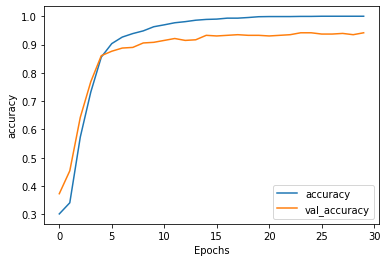

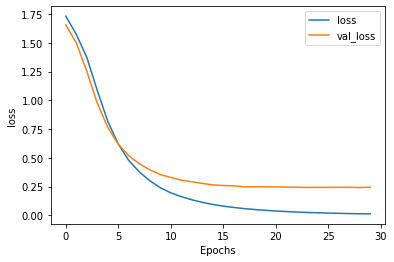

In [70]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [71]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [87]:
sample_texts = ['''Arsenal midfielder Mesut Ozil is close to completing a move to Turkish club Fenerbahce.

The 32-year-old still has half a season left on his Arsenal contract but both parties are in advanced talks which they expect to lead to an agreement to terminate it.

That would pave the way for the move to Istanbul in the coming days.

Ozil has not played for Arsenal since a 1-0 win over West Ham in March and has been frozen out by boss Mikel Arteta.

He joined the club in a £42.4m move from Real Madrid in 2013 and helped them win the FA Cup three times.

Ozil spoke of his admiration for the Turkish side during a social media question-and-answer session during the week.

"Fenerbahce is like Real Madrid in Spain. The biggest club in the country," he told followers.

Media reports in Turkey earlier this month claimed Fenerbahce would be signing Ozil in January.

And when asked about that manager Arteta said a move would only happen if it was "the best solution for everybody".''', 
'''WhatsApp has extended the deadline by which its two billion users must either accept its updated terms and conditions or stop using the service.

The original cut-off date was 8 February, but users now have until 15 May to take action.

The firm was criticised for sending the notification, which seemed to suggest changes to the data it would share with its parent company Facebook.

It said there had been "confusion" about its message.

Since the announcement and notifications went out across its platform, millions of people around the world have downloaded alternative encrypted messaging apps such as Signal and Telegram.

WhatsApp users flock to rival message platforms
In a blogpost, WhatsApp said personal messages had always been encrypted and would remain private. It added that its practice of sharing some user data with Facebook was not new, and was not going to be expanded.

"The update includes new options people will have to message a business on WhatsApp, and provides further transparency about how we collect and use data," it said.''', 
'''Uganda's long-time President Yoweri Museveni has been re-elected, electoral officials say, amid accusations of vote rigging by his main rival Bobi Wine.

Mr Museveni won almost 59% of the vote, with Bobi Wine trailing with about 35%, the Electoral Commission said.

Bobi Wine, a former pop star, earlier vowed to provide evidence of fraud. The Electoral Commission denies there was vote-rigging in Thursday's poll.

Poll monitors have criticised the government closure of internet access.

The say this undermined confidence. Bobi Wine said he would provide evidence of fraud once the internet was restored.''', 
'''Donald Trump has been impeached - again. So what now?

The president has become the first in US history to twice suffer such ignominy - impeachment means to be charged with misconduct by the lower house of US Congress.

The Democratic-controlled House of Representatives accused Mr Trump of encouraging violence with his false claims of election fraud and egging on a mob to storm the Capitol on 6 January.

Some Republicans also backed impeachment in Wednesday's vote.

What happens next?
Mr Trump, a Republican, now faces trial in the upper chamber, the Senate.

A two-thirds majority in the Senate means a conviction and removal from office.

But the president is due to leave office anyway next Wednesday, when Democrat Joe Biden will be sworn in.

So it's uncharted territory.''',
'''It is rare for a fictional TV show or movie to capture real grief effectively and honestly, given the difficulty in striking a balance between over-sentimentality and abject gloom.

But taking on such a challenge was considered worthwhile by the producers of the six-part ITV drama series Finding Alice.

Alice is a young woman left suddenly floundering and trying to "find" herself after her partner Harry dies from apparently falling down the stairs of their flash dream "smart" home, which he devotedly built himself.

Harry was Alice's rock, the one she relied on for everything and who gave her a sense of self, even though she is mother to 16-year-old Charlotte.

And if the pain of Alice's loss and disorientation is not enough, Harry's death unearths a seething cauldron of loose ends, secrets and hidden debt, and stirs up wider family divisions that threaten to engulf her.

The idea for the drama originated with Roger Goldby, notable as a director on the ITV series The Durrells.''',
'''UK meat exporters have claimed post-Brexit customs systems are "not fit for purpose", with goods delayed for hours, sometimes days, at the border.

The British Meat Processor Association said even experienced exporters were struggling with the system.

It said meat exports to the EU were 25% of normal levels for this time of year.

One large French meat importer told the BBC that he and his competitors were starting to look at alternative suppliers in Spain and Ireland.

The BBC has contacted the government for comment.

Nick Allen, chief executive of the British Meat Processor Association, said: "Fundamentally, this is not a system that was designed for a 24/7, just-in-time supply chain.

"The export health certification process was designed for moving containers of frozen meat around the world where you have a bit of leeway on time.

"No matter how much better we get at filling in the forms, it's really not fit for purpose. This is going back to the dark ages in terms of a process really, in this digital age."''']

sample_labels = ['sport','tech', 'politics', 'politics', 'entertainment', 'business']

sample_urls = ['https://www.bbc.com/sport/football/55559952', 'https://www.bbc.com/news/technology-55683745', 'https://www.bbc.com/news/world-africa-55689665', 'https://www.bbc.com/news/world-us-canada-55586677', 'https://www.bbc.com/news/entertainment-arts-55543686', 'https://www.bbc.com/news/business-55680315']

# preprocess the sample texts and labels
sampletexts_seq = tokenizer.texts_to_sequences(sample_texts)
sampletexts_padded = pad_sequences(sampletexts_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
samplelabels_seq = label_tokenizer.texts_to_sequences(sample_labels)

# predict
preds = model.predict(sampletexts_padded)

In [88]:
# check results
for pred_label, true_label in zip(preds, sample_labels):
    pred_label = label_tokenizer.index_word[np.argmax(pred_label)]
    if pred_label == true_label:
        print('predicted label:', pred_label)
        print('true label:', true_label)
        print('CORRECT')
    else:
        print('predicted label:', pred_label)
        print('true label:', true_label)
        print('INCORRECT')

predicted label: sport
true label: sport
CORRECT
predicted label: tech
true label: tech
CORRECT
predicted label: politics
true label: politics
CORRECT
predicted label: politics
true label: politics
CORRECT
predicted label: entertainment
true label: entertainment
CORRECT
predicted label: politics
true label: business
INCORRECT


In [72]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')